### KNN Regressor
KNN Regressor takes the training data and their labels (continuous values), the test data, and the size of the neighborhood (K). It returns the regressed values for the test data points. The distance function used to measure the distance between a pair of data points is Euclidean distance function.

In [1]:
# remove warning messages while installation
options(repos = getOption("repos")["CRAN"])

In [2]:
library(reshape2)
library(ggplot2)
library(corrplot)

corrplot 0.84 loaded


In [3]:
train_data <- read.csv('Data//1A_train.csv')
head(train_data)

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


In [4]:
# dimension of train data
dim(train_data)

[1] 42  2

In [5]:
summary(train_data)

       x1             y         
 Min.   :1960   Min.   : 0.610  
 1st Qu.:1965   1st Qu.: 1.245  
 Median :1970   Median : 3.195  
 Mean   :1970   Mean   : 5.023  
 3rd Qu.:1975   3rd Qu.: 7.537  
 Max.   :1980   Max.   :16.200  

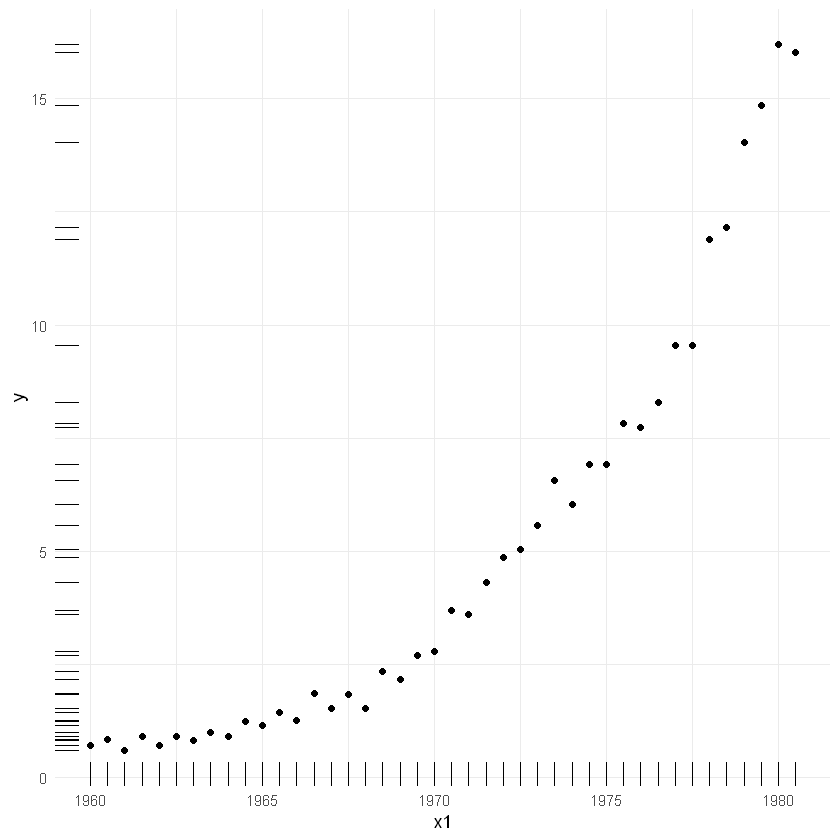

In [6]:
ggplot(data=train_data, aes(x=x1, y=y)) + 
    geom_point() + geom_rug()+ theme_minimal()

### Train and test data  

In [7]:
# create  training and testing subsets:
train.data <- data.frame(x1 = train_data[, 'x1']) # grab all records, leave out the last column
train.label <- train_data[, 'y']

test_data <- read.csv('Data//1A_test.csv')
test.data <- data.frame(x1 = test_data[, 'x1']) # grab all records, leave out last column
test.label <- test_data[, 'y']

dim(train.data) # 42 records
dim(test.data) # 42 records

[1] 42  1

[1] 42  1

### KNN Regressor

In [8]:
# KNN function
knn <- function(train.data, train.label, test.data, K=4, distance = 'euclidean'){
    # count number of train samples
    train.len <- nrow(train.data)

    # count number of test samples
    test.len <- nrow(test.data)

    # calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    # initialize testLabel
    testLabel <- rep(0.0, test.len)
    
    # for each test sample...
    for (i in 1:test.len){
        # ...find its K nearest neighbours from training samples...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        #... and calculate the predicted labels by averaging nearest neighbours values
        testLabel[i]<- mean(train.label[nn])
    }

    # return the class labels as output
    return (testLabel)
}

In [9]:
# calculate the train and test sum of square errors for K in 1:25 
miss <- data.frame('K'=1:25, 'train'=rep(0,25), 'test'=rep(0,25))
for (k in 1:25){
    miss[k,'train'] <- sum((knn(train.data, train.label, train.data, K=k) - train.label)^2)
    miss[k,'test'] <-  sum((knn(train.data, train.label, test.data, K=k) - test.label)^2)
}

**Plot the training and the testing errors versus 1/K for K=1,.., 25 in one plot.**

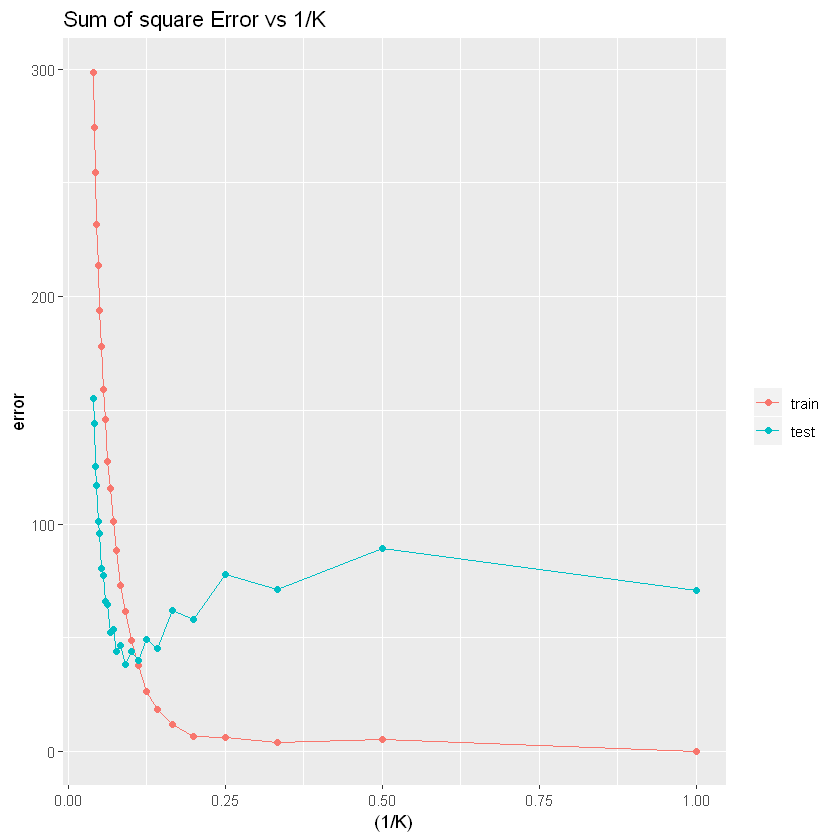

In [10]:
# plot sum of sq error percentage for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + geom_point()+
       ggtitle("Sum of square Error vs 1/K")

In [11]:
cat('Optimum value for K is', which.min(miss$test))

Optimum value for K is 11

To get the optimal value of k, we need to choose value such that it neither underfits nor overfits on test data. If we look at the above graph, at `1/k = 0.09` **(k ~ 11)**, the test error is minimum, hence it becomes our optimal value for k.

If we look closely at the graph, training error and testing error are highest for smaller values of 1/k (or large value of k). So, at that particular value of k, we can say that model is underfitting on the train data as well as test data.

As value of 1/k increases or **k decreases**, training error decreases constantly but testing error decreases to some point and then testin error increases.  

For larger values of 1/k or **smaller values of k**, we see that training error is minimum, however test error is higher at this value of 1/k, so the model is overfitting on train data and underfitting on test data.